Step 1: Importing necessary libraries. However, we shall import remaining libraries once we open the required dataset and the needed alogorithms.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Step 2 :Loading the dataset

In [33]:
df = pd.read_csv('credit_score.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Step 3: This is an classification dataset ie Multi-class classification. Output column being 'Credit_Score'. Therefore, we shall import classifications algorithms. 

In [34]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report

Step 4: Exploratory Data Analysis

In [36]:
df.shape

(100000, 28)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [38]:
df = df.drop(columns=['Name','ID','Customer_ID','SSN','Type_of_Loan','Credit_History_Age'], axis=1)
df #These are some unnecessary columns that we shall be dropping. As they provid no significant insight in our problem. 

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,_,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,3.0,_,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,3.0,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [39]:
df.isna().sum() #There are a lot of missing values which we shall treat one by one. 

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [40]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [41]:
# Replacing the special characters with empty string or with null values according to the data and converting it into int or float datatype.

df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].astype(int)

df['Occupation'] = df['Occupation'].replace('_______',np.nan)

df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].astype(float)

df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

df['Credit_Score'] = df['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace(['Bad','Standard','Good'],[0,1,2])

df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['No','Yes'],[0,1])

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

In [42]:
df.info() # All the columns have changed their data types to either int or float from object. Excpet for 3 columns which we shall change through label encoding. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [43]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

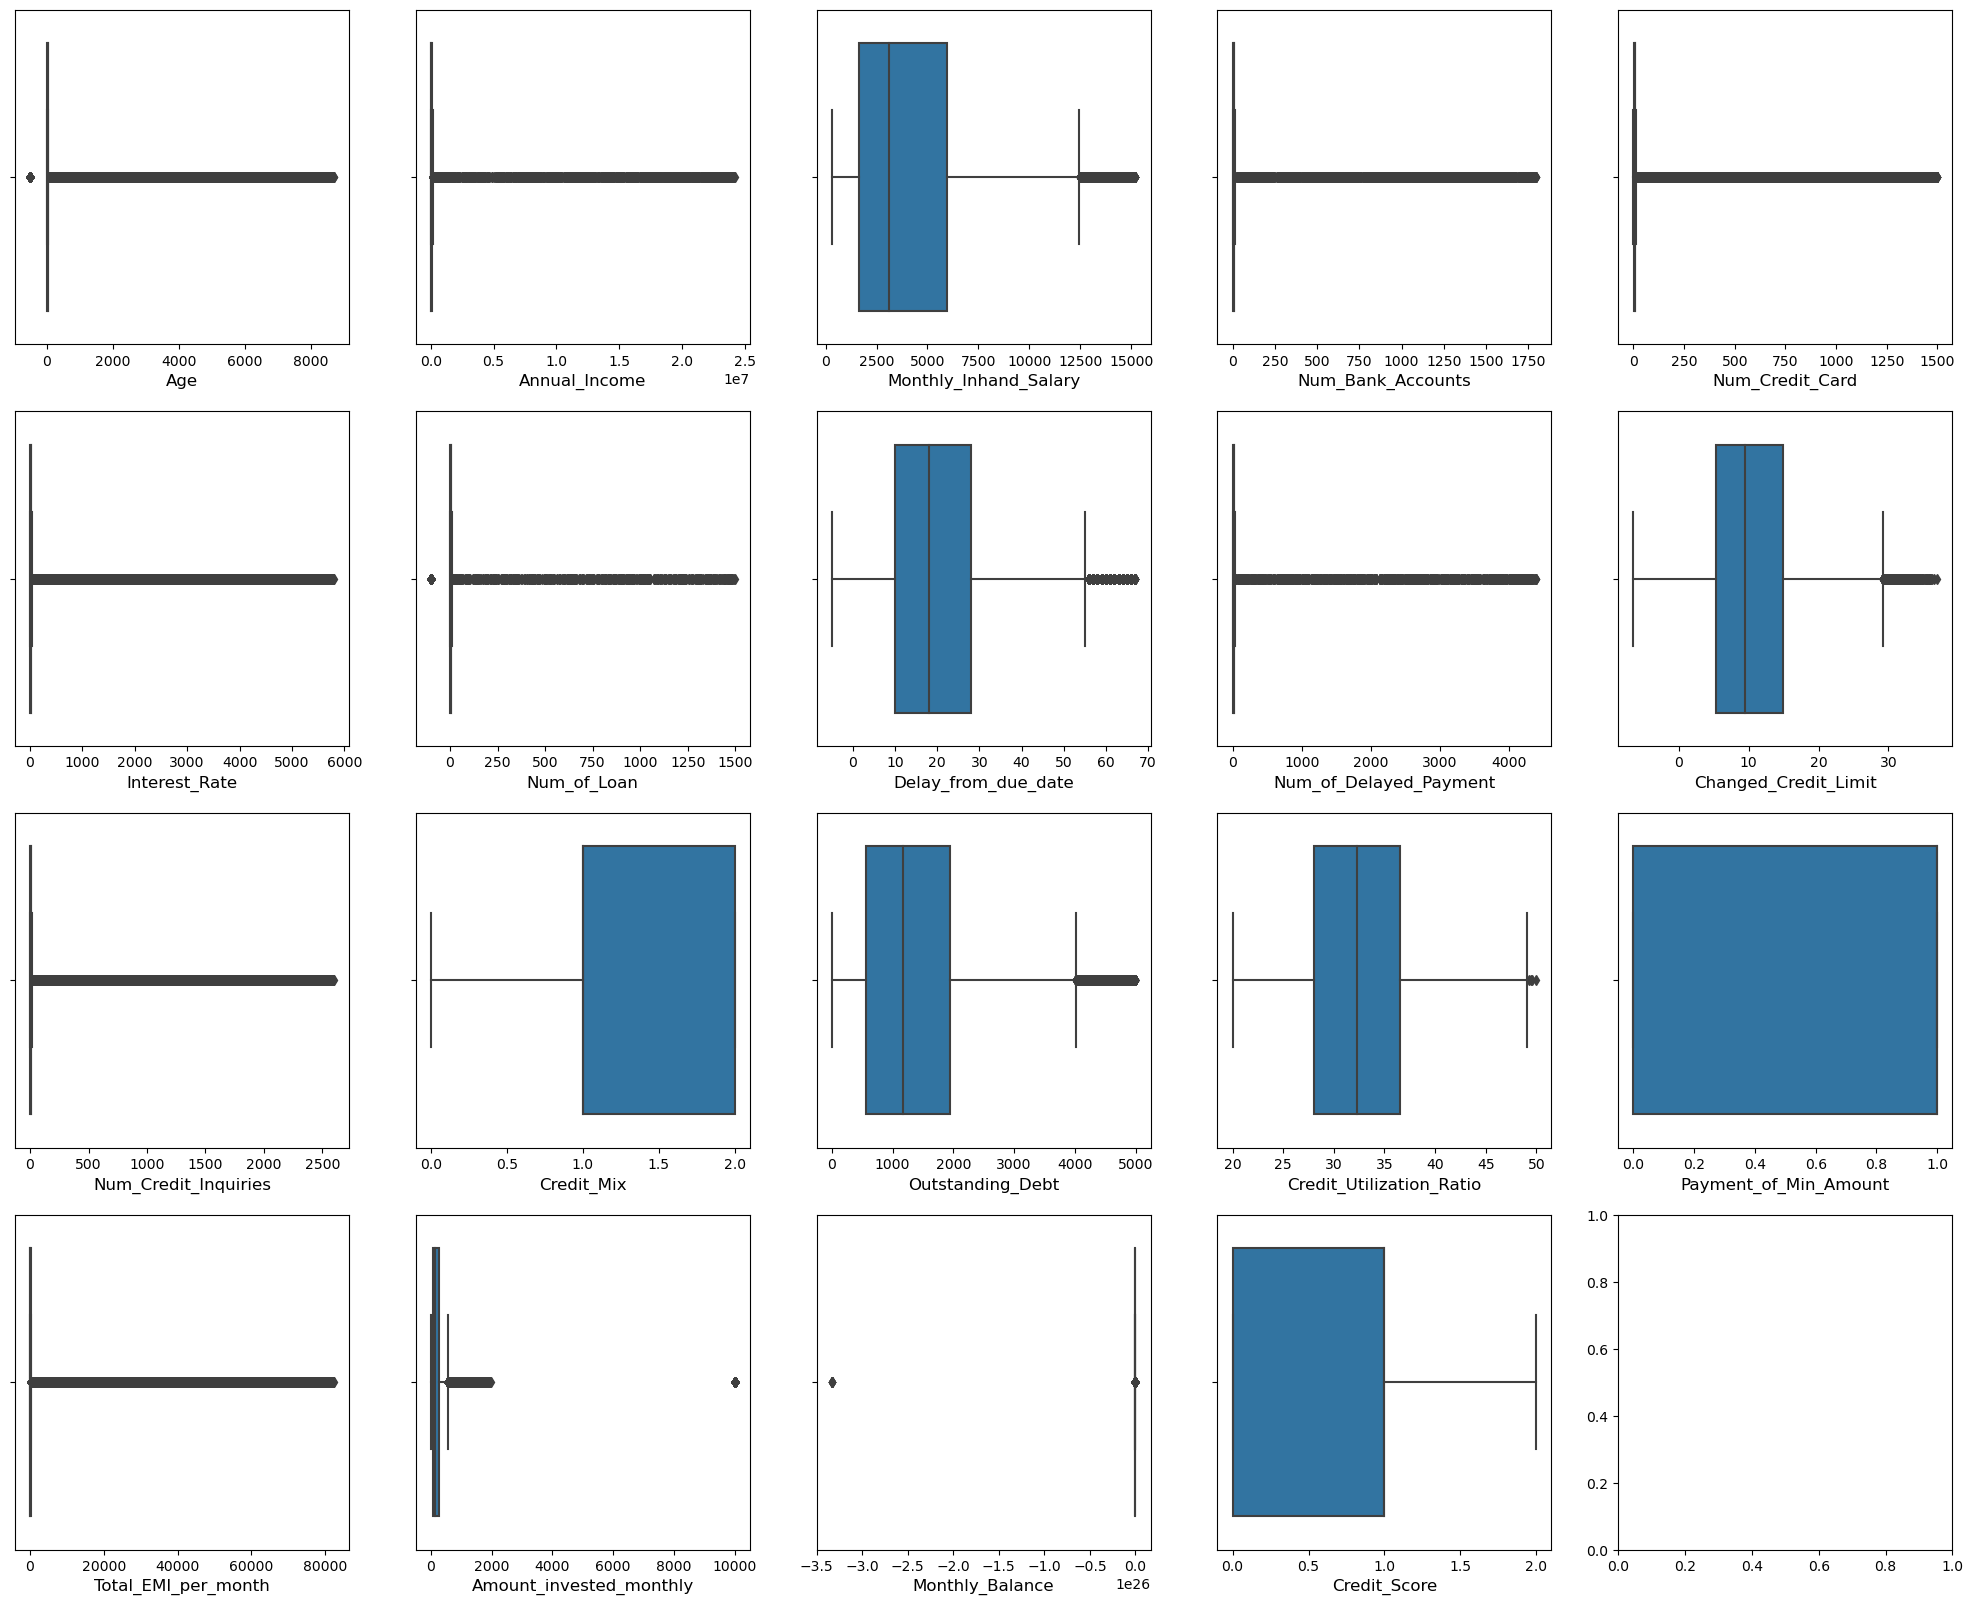

In [44]:
# We shall for any outliers using box plot

nrows = 4       
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5))

for i,j in enumerate(df.select_dtypes(include=['int32', 'int64', 'float64','float32']).columns):
    rows = i//ncols
    cols = i%ncols
    sns.boxplot(x=df[j], ax=axes[rows, cols])
    axes[rows, cols].set_xlabel(j,fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

# there are lot of outliers are in every column. For example num_Credit_card, interest_rate & num_of_loan etc are having extremely unrealistic records.

In [45]:
lb = LabelEncoder() # We shall now encode the remaining object columns before removing the outliers.

for i in df.columns:
    if df[i].dtype=='object':
        df[i] = lb.fit_transform(df[i])

In [46]:
# here we shall remove the outliers using IQR

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]

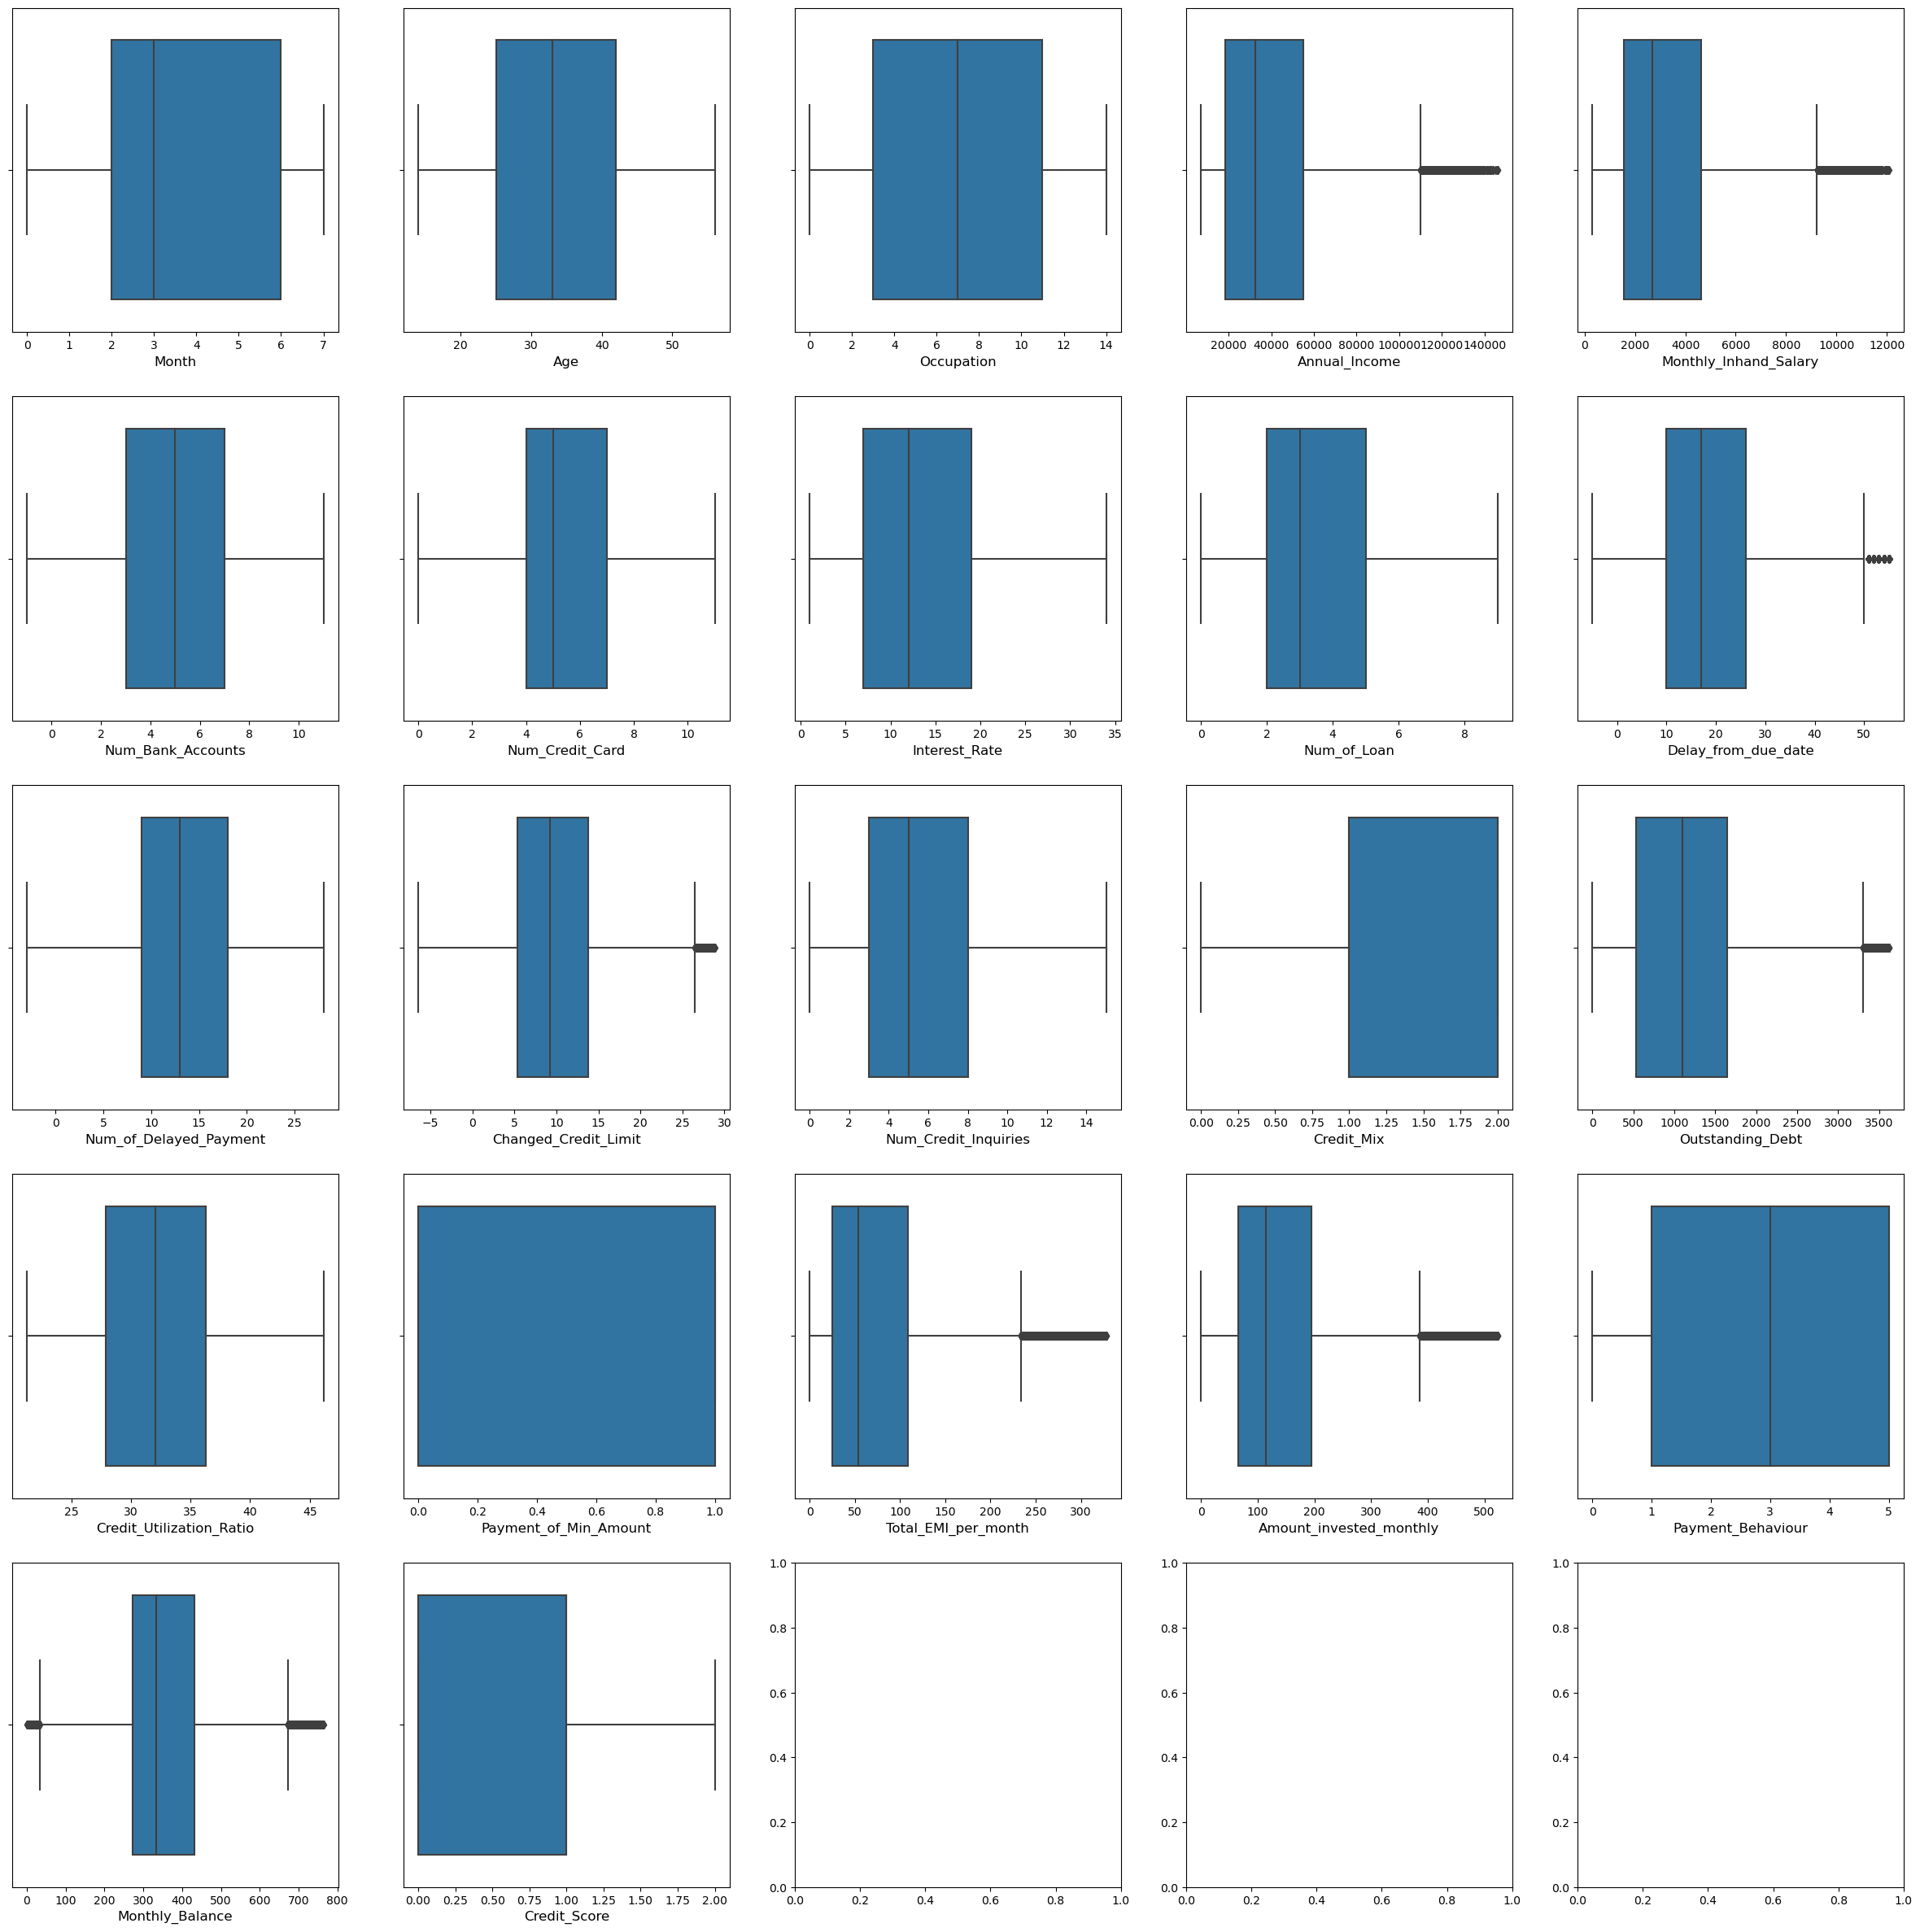

In [47]:
# Once again to check if the outliers are removed.

nrows = 5       
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6))

for i,j in enumerate(df.select_dtypes(include=['int32', 'int64', 'float64','float32']).columns):
    rows = i//ncols
    cols = i%ncols
    sns.boxplot(x=df[j], ax=axes[rows, cols])
    axes[rows, cols].set_xlabel(j,fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Credit_Score'>

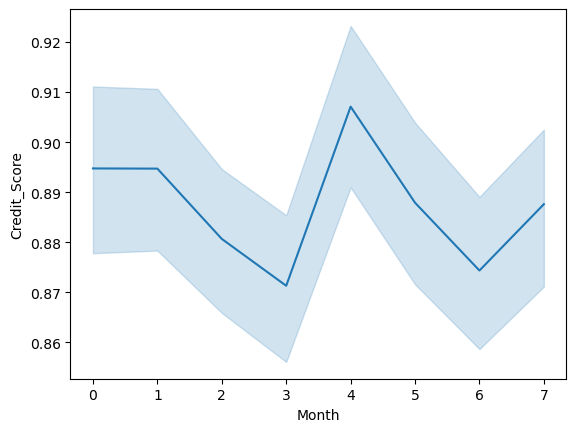

In [48]:
sns.lineplot(x=df['Month'], y=df['Credit_Score']) 
# What i observe here is that, there is fluctuactions in credit score every other month or sometimes every third month & that too the score is going downwords.
# As scredit score is impoartamt it would be better to maintain an upward trend credit score. Perhaps, people are too dependent on credit cards & thus utilizing over 30% 
# of their credit limit.

<AxesSubplot:xlabel='Age', ylabel='Credit_Score'>

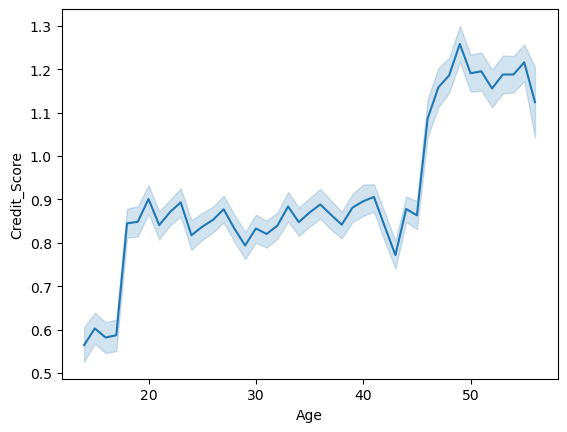

In [49]:
sns.lineplot(x=df['Age'], y=df['Credit_Score'])
# the credit sccore is pretty constant from the age group of 20 to mid 40s witht minor ups & downs. 
# those after mid 40s are having great credit score.

In [50]:
# We shall look for any Multi-collinearity in the dataset.

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_lst = list(df.columns)
col_lst.pop() # We shall remove the last columns since it is the dependent variable.

x = df[col_lst]
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif # VIF for all the columns is <5.Therefore, we shall not drop any column.

,Features,VIF
0,Month,3.300250
1,Age,10.513480
2,Occupation,3.573599
3,Annual_Income,79.287320
4,Monthly_Inhand_Salary,48.303176
5,Num_Bank_Accounts,10.117160
6,Num_Credit_Card,11.626669
7,Interest_Rate,8.805548
8,Num_of_Loan,9.440525
9,Delay_from_due_date,6.098120


Step 5: Training the model & also scaling the dataset.

In [51]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [53]:
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Logistic Regression

In [54]:
lg = LogisticRegression(random_state=42)
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_acc = accuracy_score(y_test,lg_pred)
print(lg_acc)

0.6794996895236406


# Decision Tree

In [55]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test,dt_pred)
print(dt_acc)

0.7107247405304711


# Random Forest

In [56]:
rd = RandomForestClassifier(random_state=42)
rd.fit(x_train,y_train)
rd_pred = rd.predict(x_test)
rd_acc = accuracy_score(y_test,rd_pred)
print(rd_acc)

0.8063514592388894


In [59]:
models = pd.DataFrame({'Model':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier'],
                       'Accuracy':[lg_acc,dt_acc,rd_acc]})
models.sort_values(by= 'Accuracy',ascending=False)

,Model,Accuracy
2,Random Forest Classifier,0.806351
1,Decision Tree Classifier,0.710725
0,Logistic Regression,0.679500


You can also try using MultinomialNB(Naives Bayes),Gradient boost as well as SVM. Also play around with GridSearchcv.